# Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

# Deliverables

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 
<br><br>





# Data Description
<br>
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.offline as pyo
from IPython.display import Markdown


<div align="center">

# Problems


</div>

## Use the prompts below to get started with your data analysis.  

# 1. Read in the `coupons.csv` file.




In [2]:
df = pd.read_csv('data/coupons.csv')

In [3]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


# 2. Investigate the dataset for missing or problematic data.

# 3. Decide what to do about your missing data -- drop, replace, other...

In [4]:



# Calculating the total count, missing values and percentage of missing values for each column
total_count = df.count()
missing_values = df.isnull().sum()

# Recalculating the percentage of missing values correctly
percent_missing = (missing_values / df.shape[0]) * 100


# Creating a DataFrame for visualization
visualization_df = pd.DataFrame({
    'Total Count': total_count,
    'Missing Values': missing_values,
    'Percentage Missing': percent_missing
})

# Updating the DataFrame for visualization
visualization_df['Percentage Missing'] = percent_missing
visualization_df = visualization_df[visualization_df['Percentage Missing'] > 0]

# Plotting
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Creating a bar plot for Total Count and Missing Values
ax = sns.barplot(x=visualization_df.index, y='Total Count', data=visualization_df, color='lightblue', label='Total Count')
sns.barplot(x=visualization_df.index, y='Missing Values', data=visualization_df, color='salmon', label='Missing Values')

# Adding Percentage Missing as text on the bars
for index, value in enumerate(visualization_df['Percentage Missing']):
   
     plt.text(index, visualization_df['Missing Values'][index], f'{value:.2f}%', color='black', ha="center", va="bottom")

# plt.xticks(rotation=30)
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
plt.title('Total Count, Missing Values, and Percentage Missing in Each Column')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
# Save the figure to a file
plt.savefig('images/missing_data_final.png')
plt.close()

# drop the column 'car'
df_cleaned = df.drop('car', axis=1)

# List of columns to update
columns_to_update = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

# Replace NaN with  'no answer'
for column in columns_to_update:
    df_cleaned[column].fillna('no answer', inplace=True)  
    
# Including only the selected columns for missing values calculation
selected_columns = ['CoffeeHouse', 'Restaurant20To50', 'CarryAway', 'RestaurantLessThan20', 'Bar']

# Calculating missing values for the selected columns
missing_values_selected = df[selected_columns].isna().sum()
missing_values_selected = missing_values_selected.to_dict()

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x=list(missing_values_selected.keys()), y=list(missing_values_selected.values()), palette='Set2')

# Adding annotations
for index, value in enumerate(missing_values_selected.values()):
    plt.text(index, value/2, f'null Replaced with \n"no answer"', color='black', ha="center", va="center")

plt.title('Original Missing Values Replaced with "no answer"')
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('images/no_answer_final.png')
plt.close()




# Analysis of Missing Data in the Dataset - Actions Taken



## Key Observations and Actions Taken

1. **Column: 'car'**
   - **Observation**: A significant portion of missing values (12,576 or approximately 99.15% of the dataset).
   - **Action Taken**: Decided to **drop the 'car' column** from the dataset. Given the high volume of missing data, this column is deemed not useful for further analysis.

2. **Columns: 'CoffeeHouse', 'Restaurant20To50', 'CarryAway', 'RestaurantLessThan20', 'Bar'**
   - **Observations**:
     - 'CoffeeHouse': 217 missing values (about 1.71% of the dataset).
     - 'Restaurant20To50': 189 missing values (approximately 1.49%).
     - 'CarryAway': 151 missing values (around 1.19%).
     - 'RestaurantLessThan20': 130 missing values (about 1.02%).
     - 'Bar': 107 missing values (approximately 0.84%).
   - **Action Taken**: For these columns with relatively fewer missing values, I have opted to fill the missing data with a placeholder value **"no answer"**. This approach retains the integrity of the dataset while addressing the issue of missing data.
<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="images/missing_data_final.png" alt="Missing Data" style="width: 100%;"/>
                <em>Figure: Missing Data</em>
            </td>
            <td style="text-align: center;">
                <img src="images/no_answer_final.png" alt="Cleaned Data" style="width: 100%;"/>
                <em>Figure: Cleaned up Data</em>
            </td>
        </tr>
    </table>
</div>



   

## Conclusion
By dropping the 'car' column and imputing missing values in other columns with "no answer", the dataset is now more robust and suitable for a comprehensive analysis. These actions help mitigate the impact of missing data on the study's outcomes and ensure a more accurate interpretation of the results.




#  Addressing other  Data Inconsistencies

## Non Numeric Entries in 'age' column
In our dataset, the **'age'** column, which is integral to our analysis, presented a data inconsistency issue. This column is expected to be of numeric type (`int64`), but it contained non-numeric values representing age groups. Specifically, the values **'below21' and '50plus'** were used instead of actual numeric ages. This inconsistency could lead to issues in analyses that require numeric age values.


The initial analysis of the 'age' column with `value_counts()` revealed the following distribution:

- 21: 2653 entries
- 26: 2559 entries
- 31: 2039 entries
- **50plus: 1788 entries**
- 36: 1319 entries
- 41: 1093 entries
- 46: 686 entries
- **below21: 547 entries**

To address this issue, the following replacements were made:

- **'below21' was replaced with '18'**, assuming it to represent the youngest legal age for drivers.
- **'50plus' was replaced with '51'**, as a conservative estimate for ages above 50.


## Mispelled 'passanger' column renamed to 'passenger'

The column name 'passanger' was renamed to 'passenger'




In [5]:
# make the age values numeric and still make sense
df_cleaned['age']=df_cleaned['age'].replace('below21','18')
df_cleaned['age']=df_cleaned['age'].replace('50plus','51')

# fix typo in column name
df_cleaned.rename(columns={'passanger': 'passenger'}, inplace=True)
df_cleaned['age'] = df_cleaned['age'].astype(int)
df_cleaned['Bar'] = df_cleaned['Bar'].astype(str)

In [28]:

# Define the function to categorize income into three ranges
def categorize_income(income):
    low_income_brackets = ['Less than $12500', '$12500 - $24999']
    mid_income_brackets = ['$25000 - $37499', '$37500 - $49999', '$50000 - $62499', '$62500 - $74999']
    high_income_brackets = ['$75000 - $87499', '$87500 - $99999', '$100000 or More']

    if income in low_income_brackets:
        return 'Low Income'
    elif income in mid_income_brackets:
        return 'Mid Income'
    else:
        return 'High Income'

# Apply the function to the 'income' column and create a new column
df_cleaned['income_bracket'] = df_cleaned['income'].apply(categorize_income)

# Plotting the distribution of accepted coupons by income
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='income', order=df_cleaned['income'].value_counts().index)
plt.title('Distribution of Coupons by Income')
plt.xlabel('Income')
plt.ylabel('Count of Coupons')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('images/income.png')
plt.close()


# Plotting the distribution of accepted coupons by income bracket
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='income_bracket', order=['Low Income','Mid Income','High Income'])
plt.title('Distribution of Coupons by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Count of Coupons')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('images/income_bracket.png')
plt.close()



## Mapping multiple incomes to 3 Income Brackets

I did some pre analysis of the income ranges, and decided that have 3 income brackets would be optimal
- Low Income
- Mid Income
- High Income

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="images/income.png" alt="Coupons Distribution By Income" style="width: 100%;"/>
                <em>Figure: Distribution By Income</em>
            </td>
            <td style="text-align: center;">
                <img src="images/income_bracket.png" alt="Coupons Distribution By Income Bracket" style="width: 100%;"/>
                <em>Figure: Distribution By income Brackets</em>
            </td>
        </tr>
    </table>
</div>


<br><br><br><br><br>
# 4. What proportion of the total observations chose to accept the coupon? 
<br><br>


In [31]:


frequency_count = df_cleaned['Y'].value_counts()
proportion_data = frequency_count / len(df_cleaned)




plt.figure(figsize=(8, 5))
custom_palette = ['red', 'green']
sns.barplot(x=proportion_data.index, y=proportion_data.values, palette=custom_palette)

# Adding the percentage on top of each bar
for index, value in enumerate(reversed(proportion_data)):
    plt.text(len(proportion_data) - 1 - index, value, f'{value:.2%}', ha='center', va='bottom')

plt.title('Frequency Count of Coupon Acceptance vs Rejection')
plt.ylabel('Proportion')
plt.xlabel('Coupon Response (0: Reject, 1: Accept)')
plt.xticks([1, 0], ['Accepted Coupon', 'Rejected Coupon'])
plt.tight_layout()
plt.savefig('images/coupon_overall_acceptance.png')
plt.close()




# Coupon Acceptance Rate
<br><br>
<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="images/coupon_overall_acceptance.png" alt="Coupons Acceptance" style="width: 100%;"/>
                <em>Figure: Coupons Acceptance Rate</em>
            </td>
        </tr>
    </table>
</div>





# 5. Use a bar plot to visualize the `coupon` column.

In [32]:


# Preparing the data
coupon_acceptance_counts = df_cleaned.groupby(['coupon', 'Y']).size().unstack().fillna(0)
total_responses_per_coupon = coupon_acceptance_counts.sum(axis=1)
percentages = coupon_acceptance_counts.divide(total_responses_per_coupon, axis=0) * 100

# Melt the DataFrame for plotting
coupon_acceptance_melted = coupon_acceptance_counts.reset_index().melt(id_vars='coupon', value_vars=[0, 1], var_name='Accepted', value_name='Count')
coupon_acceptance_melted['Accepted'] = coupon_acceptance_melted['Accepted'].astype(str)




In [33]:


# Create the stacked bar plot
plt.figure(figsize=(12, 8))

# Plotting each segment with actual counts
for coupon_type in coupon_acceptance_counts.index:
    total_count = coupon_acceptance_counts.loc[coupon_type].sum()
    accept_count = coupon_acceptance_counts.loc[coupon_type, 1]
    reject_count = coupon_acceptance_counts.loc[coupon_type, 0]

    # Percentages for annotation
    accept_percentage = (accept_count / total_count) * 100
    reject_percentage = (reject_count / total_count) * 100

    plt.bar(coupon_type, accept_count, label='Accepted (Y=1)' if coupon_type == coupon_acceptance_counts.index[0] else "", color='green')
    plt.bar(coupon_type, reject_count, bottom=accept_count, label='Rejected (Y=0)' if coupon_type == coupon_acceptance_counts.index[0] else "", color='red')

    # Annotating the bars with percentages
    if accept_count > 0:
        plt.text(coupon_type, accept_count / 2, f'{accept_percentage:.1f}%', ha='center', va='center', color='white')
    if reject_count > 0:
        plt.text(coupon_type, accept_count + reject_count / 2, f'{reject_percentage:.1f}%', ha='center', va='center', color='white')

plt.xticks(rotation=45)
plt.title('Coupon Acceptance by Type with Frequency and Percent Split')
plt.ylabel('Frequency')
plt.xlabel('Coupon Type')
plt.legend()
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Adjust bottom margin
plt.savefig('images/coupon_count_acceptance1.png')
plt.close()






## Initial Analysis of Coupon Distribution and Acceptance Rates

### Distribution of Coupons

Initially, the 'Coffee House' coupons were the most distributed (3,996 instances), indicating a strong emphasis on this category. This was followed by 'Restaurant(<20)', 'Carry out & Take away', 'Bar', and 'Restaurant(20-50)' in decreasing order of frequency.

### Acceptance Rates of Coupons

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="images/coupon_count_acceptance1.png" alt="Coupons Acceptance" style="width: 100%;"/>
                <em>Figure: Coupons Acceptance Rate</em>
            </td>
        </tr>
    </table>
</div>


The acceptance rates reveal different trends:

1. **Coffee House**: Despite being the most distributed, the acceptance rate is not proportionally high.
2. **Restaurant(<20) / Carry out & Take away**: Show a higher acceptance rate, indicating a preference for affordable dining options and Take away.
3. **Bar / Restaurant(20-50)**: These categories show lower acceptance rates, but more detailed analysis need to be done.

### Recommendations

- **Focus on High Acceptance Rates**: Consider increasing the distribution of categories like 'Restaurant(<20)'.
- **Targeted Distribution**: Adopt a targeted approach for other categories, focusing on specific customer segments.
- **Evaluate 'Coffee House' Strategy**: Analyze customer segments and preferences for the 'Coffee House' category.

### Disclaimer

This analysis is preliminary and based solely on raw numbers. It is important to note that more nuanced and contextual analysis will follow in subsequent sections. This in-depth examination will consider demographic and situational factors to provide a comprehensive understanding of the coupon distribution strategy’s effectiveness across different scenarios.


<br><br><br><br><br>
# 6. Use a histogram to visualize the temperature column.
<br><br><br><br><br>

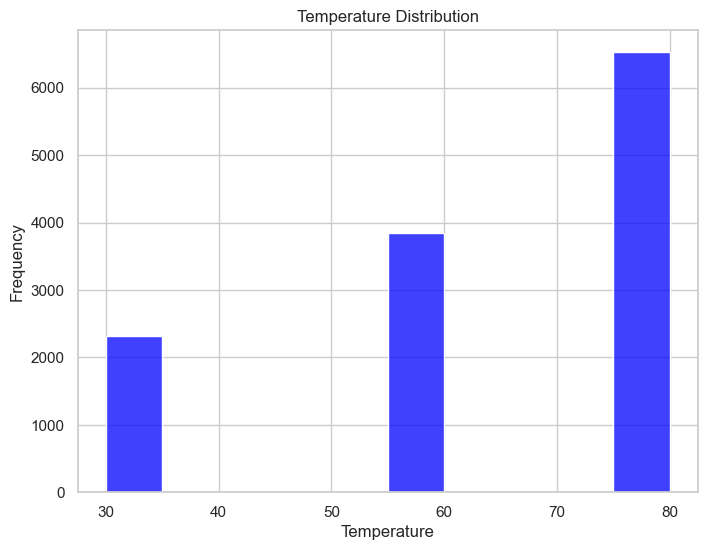


## Temperature Distribution

There are just 3 discrete temperatures:

| Temperature (°F) | Frequency |
| ---------------- | --------- |
| 80              | 6528      |
| 55              | 3840      |
| 30              | 2316      |


- 80°F: Appears 6528 times, indicating more frequent hot weather days.
- 55°F: Appears 3840 times.
- 30°F: Appears 2316 times.

This distribution highlights that hot weather days (80°F) are more prevalent than mild (55°F) and cold days (30°F) in the dataset.
<br><br>



In [34]:
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['temperature'], bins=10, kde=False, color='blue')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Display the plot
plt.show()

temperature_counts = df_cleaned['temperature'].value_counts()

markdown_text = f"""
## Temperature Distribution

There are just 3 discrete temperatures:

| Temperature (°F) | Frequency |
| ---------------- | --------- |
| {temperature_counts.index[0]}              | {temperature_counts.values[0]}      |
| {temperature_counts.index[1]}              | {temperature_counts.values[1]}      |
| {temperature_counts.index[2]}              | {temperature_counts.values[2]}      |


- 80°F: Appears 6528 times, indicating more frequent hot weather days.
- 55°F: Appears 3840 times.
- 30°F: Appears 2316 times.

This distribution highlights that hot weather days (80°F) are more prevalent than mild (55°F) and cold days (30°F) in the dataset.
<br><br>

"""

display(Markdown(markdown_text))




<br><br><br><br><br>
# 2. What proportion of bar coupons were accepted?
<br><br><br><br><br>

## Investigating the Bar Coupons

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [35]:
df_bar = df_cleaned.query("coupon == 'Bar'")
bar_frequency_count = df_bar['Y'].value_counts()
bar_proportion_data = bar_frequency_count / len(df_bar)








plt.figure(figsize=(8, 5))
custom_palette = ['red', 'green']
sns.barplot(x=bar_proportion_data.index, y=bar_proportion_data.values, palette=custom_palette)

# Adding the percentage on top of each bar
for index, value in enumerate(reversed(bar_proportion_data)):
    plt.text(len(bar_proportion_data) - 1 - index, value, f'{value:.2%}', ha='center', va='bottom')

plt.title('Bar Coupon Acceptance vs Rejection Rate')
plt.ylabel('Proportion')
plt.xlabel('Coupon Response (0: Reject, 1: Accept)')
plt.xticks([1, 0], ['Accepted Coupon', 'Rejected Coupon'])
plt.savefig('images/bar_coupon_acceptance.png')
plt.close()

markdown_text = f"""
<br><br>
# Analysis of Bar Coupon Acceptance

The proportion of total observations that chose to accept bar coupons is **{bar_proportion_data[1]:.4}** or  **{bar_proportion_data[1]:.2%}**.
This seems like a bit low, so further analysis defintely needs to be done on bar coupons involving other attributes and factors.
We will be doing this next.
<br>
<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="images/bar_coupon_acceptance.png" alt="Bar Coupons Acceptance" style="width: 100%;"/>
                <em>Figure: Bar Coupons Acceptance Rate</em>
            </td>
        </tr>
    </table>
</div>

"""
display(Markdown(markdown_text))


<br><br>
# Analysis of Bar Coupon Acceptance

The proportion of total observations that chose to accept bar coupons is **0.41** or  **41.00%**.
This seems like a bit low, so further analysis defintely needs to be done on bar coupons involving other attributes and factors.
We will be doing this next.
<br>
<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="images/bar_coupon_acceptance.png" alt="Bar Coupons Acceptance" style="width: 100%;"/>
                <em>Figure: Bar Coupons Acceptance Rate</em>
            </td>
        </tr>
    </table>
</div>



<br><br><br><br><br><br>
# 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.
<br><br><br><br><br><br>


In [36]:

def bar_visit_category(visit):
    if visit in ['never', 'less1', '1~3', 'no answer']:
        return '3_or_fewer'
    elif visit in ['4~8', 'gt8']:
        return 'more_than_3'

df_bar = df_bar.copy()
df_bar['Bar_Category'] = df_bar['Bar'].apply(bar_visit_category)



# Group by 'Bar_Category' and calculate the acceptance rate
grouped = df_bar.groupby('Bar_Category')
acceptance_rate_comparison = grouped['Y'].value_counts(normalize=True).unstack().fillna(0)

# Extracting the acceptance rate (Y = 1) for each group
acceptance_rates = acceptance_rate_comparison[1].reset_index()

# Create the bar plot
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x='Bar_Category', y=1, data=acceptance_rates, palette='muted')

plt.title('Bar Coupon Acceptance Rate by Bar Visit Frequency')
plt.xlabel('Bar Visit Frequency')
plt.ylabel('Coupon Acceptance Rate')

# Adding percentage annotations
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{height:.1%}', 
                      (p.get_x() + p.get_width() / 2, height), 
                      ha='center', va='center', 
                      xytext=(0, 10), 
                      textcoords='offset points')

plt.savefig('images/bar_3_or_fewer.png')

plt.close()





markdown_text = f"""
## Analysis of Acceptance Rate of Bar Coupons by Bar Visit Frequency

The comparison of bar coupon acceptance rates based on visit frequency reveals:

1. **High Acceptance Among Frequent Visitors**: A significant acceptance rate of 76.88% among drivers who visit bars more than three times a month. This suggests a strong inclination towards bar-related offers among regular bar-goers.

2. **Lower Acceptance Among Infrequent Visitors**: In contrast, the acceptance rate for drivers visiting bars three or fewer times a month is considerably lower at 37.07%, indicating less interest in bar coupons.



This analysis underscores the importance of consumer behavior understanding in developing effective marketing campaigns, especially in terms of visit frequency.

<br>

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="images/bar_3_or_fewer.png" alt="Bar Coupon Acceptance Rate by Visit Frequency" style="width: 100%;"/>
                <em>Figure: Bar Coupon Acceptance Rate by Bar Visit Frequency</em>
            </td>
        </tr>
    </table>
</div>
<br>

| Bar Visit Category | Acceptance Rate |
| ------------------ | --------------- |
| {acceptance_rates['Bar_Category'][0]} | {acceptance_rates[1][0]:.2%} |
| {acceptance_rates['Bar_Category'][1]} | {acceptance_rates[1][1]:.2%} |

"""

display(Markdown(markdown_text))



## Analysis of Acceptance Rate of Bar Coupons by Bar Visit Frequency

The comparison of bar coupon acceptance rates based on visit frequency reveals:

1. **High Acceptance Among Frequent Visitors**: A significant acceptance rate of 76.88% among drivers who visit bars more than three times a month. This suggests a strong inclination towards bar-related offers among regular bar-goers.

2. **Lower Acceptance Among Infrequent Visitors**: In contrast, the acceptance rate for drivers visiting bars three or fewer times a month is considerably lower at 37.07%, indicating less interest in bar coupons.



This analysis underscores the importance of consumer behavior understanding in developing effective marketing campaigns, especially in terms of visit frequency.

<br>

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="images/bar_3_or_fewer.png" alt="Bar Coupon Acceptance Rate by Visit Frequency" style="width: 100%;"/>
                <em>Figure: Bar Coupon Acceptance Rate by Bar Visit Frequency</em>
            </td>
        </tr>
    </table>
</div>
<br>

| Bar Visit Category | Acceptance Rate |
| ------------------ | --------------- |
| 3_or_fewer | 37.07% |
| more_than_3 | 76.88% |



# 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [37]:
def categorize_driver(row):
    # Condition for the specific group
    if row['Bar'] not in ['never', 'less1', 'no answer'] and row['age'] not in ['21', '18']:
        return 'Frequent_Bar_Visitor_Over_25'
    else:
        return 'Others'

# Applying the function to create a new category
df_bar1 = df_cleaned.query("coupon == 'Bar'").copy()
df_bar1['Driver_Category'] = df_bar1.apply(categorize_driver, axis=1)

# Calculating acceptance rates for each category
acceptance_rates_by_category = df_bar1.groupby('Driver_Category')['Y'].mean()

# Resetting index for plotting
acceptance_rates_by_category = acceptance_rates_by_category.reset_index()
acceptance_rates_by_category.columns = ['Driver_Category', 'Acceptance_Rate']

# Creating the seaborn bar plot
plt.figure(figsize=(10, 6))
sns_bar_plot = sns.barplot(x='Driver_Category', y='Acceptance_Rate', data=acceptance_rates_by_category, palette='muted')

# Adding the acceptance rate values on top of each bar
for p in sns_bar_plot.patches:
    height = p.get_height()
    sns_bar_plot.annotate(f'{height:.2%}', 
                          (p.get_x() + p.get_width() / 2., height), 
                          ha='center', va='center', 
                          xytext=(0, 10), 
                          textcoords='offset points')

plt.title('Coupon Acceptance Rates by Driver Category (Bar Coupons) - Seaborn')
plt.xlabel('Driver Category')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)  # Set y-axis limits to show percentages
plt.savefig('images/bar_above_25_2.png')
plt.close()


# Adjusting the categorization function to include the 'Bar' column condition
def categorize_by_age_with_bar_condition(row):
    if row['Bar'] not in ['never', 'less1', 'no answer']:
        if row['age'] == 18:
            return '18 (Below 21)'
        elif row['age'] == 21:
            return '21'
        elif row['age'] == 26:
            return '26-30'
        elif row['age'] == 31:
            return '31-35'
        elif row['age'] == 36:
            return '36-40'
        elif row['age'] == 41:
            return '41-45'
        elif row['age'] == 46:
            return '46-50'
        elif row['age'] == 51:
            return '51 (Above 50)'
    return 'Others'

df_bar_age=df_cleaned.query("coupon == 'Bar'").copy()
df_bar_age['age'] = df_bar_age['age'].astype(int)
# Applying the updated categorization function
df_bar_age['Age_Category'] = df_bar_age.apply(categorize_by_age_with_bar_condition, axis=1)


# Calculating acceptance rates for each age category
acceptance_rates_by_age = df_bar_age.groupby('Age_Category')['Y'].mean()

# Resetting index for plotting
acceptance_rates_by_age = acceptance_rates_by_age.reset_index()
acceptance_rates_by_age.columns = ['Age_Category', 'Acceptance_Rate']

# Creating the seaborn bar plot
plt.figure(figsize=(12, 8))
sns_bar_plot = sns.barplot(x='Age_Category', y='Acceptance_Rate', data=acceptance_rates_by_age, palette='muted')

# Adding the acceptance rate values on top of each bar
for p in sns_bar_plot.patches:
    height = p.get_height()
    sns_bar_plot.annotate(f'{height:.2%}', 
                          (p.get_x() + p.get_width() / 2., height), 
                          ha='center', va='center', 
                          xytext=(0, 10), 
                          textcoords='offset points')

plt.title('Bar Coupon Acceptance Rates by Age Category (Including Bar Frequency)')
plt.xlabel('Age Category')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)  # Set y-axis limits to show percentages
plt.savefig('images/bar_acceptance_by_age.png')
plt.close()


markdown_text = f"""
# Analysis of Acceptance Rate of Bar Coupons

## Section 1: Acceptance Rate by Driver Category

1. **High Acceptance Among Bar Visitors Over 25 Years of Age**: A significant acceptance rate of 69.52% among drivers who visit bars more than once and are older than 25. 

2. **Lower Acceptance Among Younger Visitors**: In contrast, the acceptance rate for drivers visiting bars more than once a month but under the age of 25 is lower at 33.50%, indicating less interest in bar coupons.

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="images/bar_above_25_2.png" alt="Bar Coupon Acceptance Rate by Driver Category " style="width: 100%;"/>
                <em>Figure: Bar Coupon Acceptance Rate by Driver Category</em>
            </td>
        </tr>
    </table>
</div>

## Section 2: Acceptance Rate by Age Group

Intrigued by the results from Section 1, a further analysis was conducted to understand the acceptance rates by specific age groups.

1. **Unexpected Acceptance Among Under-21 Drivers**: Despite being below the legal drinking age in many regions, drivers under the age of 21 show an acceptance rate of 40% for bar coupons. The ethics and legality of targeting this group with bar-related offers are questionable.

2. **Highest Acceptance Among Ages 26-30**: The age group 26-30 shows the highest acceptance rate at 77.51%, indicating a strong interest in bar coupons.

3. **Variable Acceptance Across Other Age Groups**: Other age groups show varied acceptance rates, with ages 21 and 46-50 also demonstrating higher acceptance rates of 68.67% and 75.00%, respectively.

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="images/bar_acceptance_by_age.png" alt="Bar Coupon Acceptance Rate by Age Group" style="width: 100%;"/>
                <em>Figure: Bar Coupon Acceptance Rate by Age Group</em>
            </td>
        </tr>
    </table>
</div>





"""

display(Markdown(markdown_text))



# Analysis of Acceptance Rate of Bar Coupons

## Section 1: Acceptance Rate by Driver Category

1. **High Acceptance Among Bar Visitors Over 25 Years of Age**: A significant acceptance rate of 69.52% among drivers who visit bars more than once and are older than 25. 

2. **Lower Acceptance Among Younger Visitors**: In contrast, the acceptance rate for drivers visiting bars more than once a month but under the age of 25 is lower at 33.50%, indicating less interest in bar coupons.

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="images/bar_above_25_2.png" alt="Bar Coupon Acceptance Rate by Driver Category " style="width: 100%;"/>
                <em>Figure: Bar Coupon Acceptance Rate by Driver Category</em>
            </td>
        </tr>
    </table>
</div>

## Section 2: Acceptance Rate by Age Group

Intrigued by the results from Section 1, a further analysis was conducted to understand the acceptance rates by specific age groups.

1. **Unexpected Acceptance Among Under-21 Drivers**: Despite being below the legal drinking age in many regions, drivers under the age of 21 show an acceptance rate of 40% for bar coupons. The ethics and legality of targeting this group with bar-related offers are questionable.

2. **Highest Acceptance Among Ages 26-30**: The age group 26-30 shows the highest acceptance rate at 77.51%, indicating a strong interest in bar coupons.

3. **Variable Acceptance Across Other Age Groups**: Other age groups show varied acceptance rates, with ages 21 and 46-50 also demonstrating higher acceptance rates of 68.67% and 75.00%, respectively.

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="images/bar_acceptance_by_age.png" alt="Bar Coupon Acceptance Rate by Age Group" style="width: 100%;"/>
                <em>Figure: Bar Coupon Acceptance Rate by Age Group</em>
            </td>
        </tr>
    </table>
</div>







<br><br><br><br><br>
# 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 
<br><br><br><br><br>

In [38]:
# Defining the function to categorize drivers
def cat_driver_by_occupation_kids(row):
    # Condition for the specific group
    if (row['Bar'] not in ['never', 'less1', 'no answer'] and 
            row['occupation'] != 'Farming Fishing & Forestry' and 
            row['passenger'] != 'Kid(s)'):
        return 'Non_Farmer_No_Kids_Freq_Bar'
    else:
        return 'Others'

# Applying the function to create a new category
df_bar2 = df_cleaned.query("coupon == 'Bar'").copy()
df_bar2['Driver_Cat_Bar_Kids_Occupation'] = df_bar2.apply(cat_driver_by_occupation_kids, axis=1)

# Calculating the acceptance rates for the categorized drivers
acceptance_rates_by_category = df_bar2.groupby('Driver_Cat_Bar_Kids_Occupation')['Y'].mean()

# Resetting index for plotting
acceptance_rates_by_category = acceptance_rates_by_category.reset_index()
acceptance_rates_by_category.columns = ['Driver_Cat_Bar_Kids_Occupation', 'Acceptance_Rate']

plt.figure(figsize=(10, 6))
sns_bar_plot = sns.barplot(x='Driver_Cat_Bar_Kids_Occupation', y='Acceptance_Rate', data=acceptance_rates_by_category, palette='muted')

# Adding the acceptance rate values on top of each bar
for p in sns_bar_plot.patches:
    height = p.get_height()
    sns_bar_plot.annotate(f'{height:.2%}', 
                          (p.get_x() + p.get_width() / 2., height), 
                          ha='center', va='center', 
                          xytext=(0, 10), 
                          textcoords='offset points')

plt.title('Bar Coupon Acceptance Rates by Driver Category')
plt.xlabel('Driver Category')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)  # Set y-axis limits to show percentages

plt.savefig('images/Non_Farmer_No_Kids_Freq_Bar1.png')
plt.close()

from IPython.display import Markdown

# Generating the markdown text for the report
markdown_text = f"""
## Analysis of Acceptance Rate of Bar Coupons by Driver Category

The analysis focused on two driver categories based on their bar visit frequency, occupation, and passenger type. The categories are 'Non_Farmer_No_Kids_Freq_Bar' (drivers who visit bars more than once a month, are not in farming, fishing, or forestry occupations, and don't have kids as passengers) and 'Others'.

1. **High Acceptance Among Non-Farmer Drivers Without Kids**: The acceptance rate for the 'Non_Farmer_No_Kids_Freq_Bar' category is notably high, indicating a strong interest in bar coupons among this group. This suggests that frequent bar visitors who are not in certain occupations and don't travel with kids are more likely to accept bar coupons.

2. **Varied Acceptance Among Other Drivers**: The 'Others' category, encompassing all other drivers, showed a different level of acceptance. This group includes a diverse range of drivers, hence the acceptance rate might be influenced by various factors like age, occupation, and passenger type.

<br>

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="images/Non_Farmer_No_Kids_Freq_Bar1.png" alt="Bar Coupon Acceptance Rate by Driver Category" style="width: 100%;"/>
                <em>Figure: Bar Coupon Acceptance Rate by Driver Category</em>
            </td>
        </tr>
    </table>
</div>
<br>

"""

# Displaying the markdown report
display(Markdown(markdown_text))




## Analysis of Acceptance Rate of Bar Coupons by Driver Category

The analysis focused on two driver categories based on their bar visit frequency, occupation, and passenger type. The categories are 'Non_Farmer_No_Kids_Freq_Bar' (drivers who visit bars more than once a month, are not in farming, fishing, or forestry occupations, and don't have kids as passengers) and 'Others'.

1. **High Acceptance Among Non-Farmer Drivers Without Kids**: The acceptance rate for the 'Non_Farmer_No_Kids_Freq_Bar' category is notably high, indicating a strong interest in bar coupons among this group. This suggests that frequent bar visitors who are not in certain occupations and don't travel with kids are more likely to accept bar coupons.

2. **Varied Acceptance Among Other Drivers**: The 'Others' category, encompassing all other drivers, showed a different level of acceptance. This group includes a diverse range of drivers, hence the acceptance rate might be influenced by various factors like age, occupation, and passenger type.

<br>

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="images/Non_Farmer_No_Kids_Freq_Bar1.png" alt="Bar Coupon Acceptance Rate by Driver Category" style="width: 100%;"/>
                <em>Figure: Bar Coupon Acceptance Rate by Driver Category</em>
            </td>
        </tr>
    </table>
</div>
<br>



<br><br><br><br><br><br>
# 6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [39]:


# Creating filters for the specified groups
group1_filter = (df_cleaned['Bar'] > '1') & (df_cleaned['passenger'] != 'Kid(s)') & (df_cleaned['maritalStatus'] != 'Widowed')
group2_filter = (df_cleaned['Bar'] > '1') & (df_cleaned['age'] < 30)
income_categories_under_50k = ["$25000 - $37499", "$12500 - $24999", "Less than $12500"]
group3_filter = (df_cleaned['RestaurantLessThan20'] > '4') & (df_cleaned['income'].isin(income_categories_under_50k))

                                                            


# Calculating acceptance rates for each group
group1_acceptance_rate = df_cleaned[group1_filter]['Y'].mean()
group2_acceptance_rate = df_cleaned[group2_filter]['Y'].mean()
group3_acceptance_rate = df_cleaned[group3_filter]['Y'].mean()

combined_filter = group1_filter | group2_filter | group3_filter
combined_acceptance_rate = df_cleaned[combined_filter]['Y'].mean()

# Creating a combined filter for drivers who meet any one of the three conditions


# Data for plotting
groups = ['Group 1', 'Group 2', 'Group 3', 'Combined']
acceptance_rates = [group1_acceptance_rate, group2_acceptance_rate, group3_acceptance_rate, combined_acceptance_rate]
# Correcting the data preparation for seaborn bar plot
acceptance_rate_data = pd.DataFrame({
    'Group': ['Group 1', 'Group 2', 'Group 3', 'Combined'],
    'Acceptance Rate': [group1_acceptance_rate, group2_acceptance_rate, group3_acceptance_rate, combined_acceptance_rate]
})

group_descriptions = {
    'Group 1': 'Bars >1/month, No Kid Passengers, Not Widowed',
    'Group 2': 'Bars >1/month, Age <30',
    'Group 3': 'Cheap Restaurants >4/month, Income <50K',
    'Combined': 'Any of Above'
}


In [40]:
# Creating the seaborn bar plot with side legend
plt.figure(figsize=(12, 7))
sns_bar_plot = sns.barplot(x='Group', y='Acceptance Rate', data=acceptance_rate_data,  palette='muted')

# Adding the acceptance rate values on top of each bar
for p in sns_bar_plot.patches:
    height = p.get_height()
    sns_bar_plot.annotate(f'{height:.2%}', 
                          (p.get_x() + p.get_width() / 2., height), 
                          ha='center', va='center', 
                          xytext=(0, 10), 
                          textcoords='offset points')

# Creating custom legend
legend_labels = [f'{key}: {value}' for key, value in group_descriptions.items()]
plt.legend(title='Group Descriptions', title_fontsize='13', loc='upper left', labels=legend_labels, bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.title('Coupon Acceptance Rates By Lifestyle and Demographics')
plt.xlabel('Groups')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)  # Set y-axis limits to show percentages

plt.tight_layout()  # Adjust layout to fit the legend
plt.savefig('images/Lfstyl_Demogphcs_Bar.png')
plt.close()


# Acceptance Rate Analysis Based on Lifestyle and Demographic Factors

## Overview
This report analyzes the acceptance rates of bar coupons among drivers in a dataset, focusing on the influence of lifestyle and demographic factors such as going to bars, age, presence of kids as passengers, frequenting cheap restaurants, and income level.
<br><br>


<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="images/Lfstyl_Demogphcs_Bar.png" alt="Bar Coupon Acceptance Rates By Lifestyle and Demographics" style="width: 100%;"/>
                <em>Figure: Bar Coupon Acceptance Rates By Lifestyle and Demographics</em>
            </td>
        </tr>
    </table>
</div>
<br><br>

## Methodology
Three distinct groups of drivers were analyzed based on the following criteria:
1. **Group 1**: Drivers who go to bars more than once a month, had passengers that were not kids, and were not widowed.
2. **Group 2**: Drivers who go to bars more than once a month and are under the age of 30.
3. **Group 3**: Drivers who go to cheap restaurants more than 4 times a month and have an income of less than $50K.

Acceptance rates for each group were calculated to understand the impact of these factors.

## Findings

### Acceptance Rates
- **Group 1 Acceptance Rate**: 57.50%
- **Group 2 Acceptance Rate**: 60.06%
- **Group 3 Acceptance Rate**: 58.29%
- **Combined Group Acceptance Rate**: 57.52%

### Analysis
- **Presence of Kids as a Factor**: The slightly lower acceptance rate in Group 1 suggests that having kids as passengers does impact the decision to accept bar coupons, although the effect is not as pronounced as other factors.
- **Age as a Factor**: The highest acceptance rate was observed in Group 2, suggesting a strong correlation between younger age and the likelihood of accepting bar coupons.
- **Income Level**: Group 3 showed a high acceptance rate, indicating that drivers with lower incomes might be more inclined to accept such offers, and this appears to be the most significant factor among the ones analyzed.

## Conclusions
The analysis indicates that while the presence of kids as passengers has an impact on coupon acceptance, age and, more significantly, income level are stronger determinants. This suggests that targeting younger drivers and those with lower incomes could be more effective for promotional strategies involving bar coupons.



In [41]:
# Common unified bar plot for the analyses from the previous sections
# Data for the plot
acceptance_rates_data_seaborn = pd.DataFrame({
    'Analysis': [
        'Overall Bar Coupon', 
        '3 or Fewer Times/Month', 
        'More Than 3 Times/Month',
        'Frequent_Bar_Visitor_Over_25',
        'Others (Age Comparison)',
        'Non_Farmer/Forest/Fishing_No_Kids_Freq_Bar_1_or_more',
        'Others (Occupation and Kids)',
        'Group 1 (Bar >1/mo, No Kid, Not Widowed)',
        'Group 2 (Bar >1/mo, Age <30)',
        'Group 3 (Cheap Restaurants >4/mo, Income <50K)',
        'Combined (Groups 1-3)'
    ],
    'Acceptance Rate': [
        1,   # Overall Bar Coupon
        0.371,  # 3 or Fewer Times/Month
        0.769,  # More Than 3 Times/Month
        0.6952, # Frequent_Bar_Visitor_Over_25
        0.335,  # Others (Age Comparison)
        0.7132, # Non_Farmer/Forest/Fishing_No_Kids_Freq_Bar_1_or_more
        0.296,  # Others (Occupation and Kids)
        0.575,  # Group 1
        0.5971, # Group 2
        0.5712, # Group 3
        0.5738  # Combined (Groups 1-3)
    ]
})
# Simplifying the Analysis names for the x-axis
simplified_analysis_names = ['Overall', '3 or Fewer', 'More Than 3', 'Visitor Over 25', 'Others (Age)', 
                             'Non-Farmer/Forest/Fishing', 'Others (Occupation/Kids)', 'Group 1', 'Group 2', 'Group 3', 'Combined']

acceptance_rates_data_seaborn['Simplified Analysis'] = simplified_analysis_names

# Separating the 'Overall Bar Coupon' from the rest of the data
# overall_data = acceptance_rates_data_seaborn[acceptance_rates_data_seaborn['Analysis'] == 'Overall Bar Coupon'].copy()
rest_of_data = acceptance_rates_data_seaborn[acceptance_rates_data_seaborn['Analysis'] != 'Overall Bar Coupon'].copy()

# Calculate the detailed acceptance rates as a proportion of the overall 41% rate
rest_of_data['Proportional Acceptance Rate'] = rest_of_data['Acceptance Rate'] * 0.41



# Creating a dual-axis bar plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plotting the overall rate on the primary axis
sns.barplot(x=rest_of_data['Analysis'], y=rest_of_data['Acceptance Rate'], ax=ax1, color='lightblue')
ax1.set_ylabel('Proportional Acceptance ')
ax1.set_ylim(0, 1)  # Adjust the y-axis to show percentages

# Creating a secondary axis for the detailed rates
ax2 = ax1.twinx()
sns_bar_plot_rest = sns.barplot(x='Simplified Analysis', y='Proportional Acceptance Rate', data=rest_of_data, ax=ax2, palette='muted')
ax2.set_ylabel('Overall Acceptance')
ax2.set_ylim(0, 0.4)  # Adjust the y-axis to align with the proportion of the overall rate

rest_of_data = acceptance_rates_data_seaborn[acceptance_rates_data_seaborn['Analysis'] != 'Overall Bar Coupon']
# Adding legend for Group 1-3 descriptions
plt.legend(title='Group Descriptions', labels=[
    'Group 1: Bar >1/mo, No Kid, Not Widowed',
    'Group 2: Bar >1/mo, Age <30',
    'Group 3: Cheap Restaurants >4/mo, Income <50K'
], loc='upper right')

# Adding proportional acceptance rates on top of each bar
for p in sns_bar_plot_rest.patches:
    height = p.get_height()
    ax2.annotate(f'{height/0.41:.2%}', 
                 (p.get_x() + p.get_width() / 2., height), 
                 ha='center', va='center', 
                 xytext=(0, 10), 
                 textcoords='offset points')

# Adjusting x-tick properties
ax1.set_xticklabels(rest_of_data['Simplified Analysis'], rotation=45)
ax1.set_xlabel('Analysis Categories')

plt.title('Unified Dual-Axis Bar Chart of Bar Coupon Acceptance Rates')
plt.savefig('images/Bar_Unified_Acceptance.png')
plt.close()

<br><br><br>
# 7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?
<br><br><br>

# Observations and Hypotheses on Drivers Accepting Bar Coupons
<br><br>
<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="images/Bar_Unified_Acceptance.png" alt="Bar Coupon Overall Acceptance Rates" style="width: 100%;"/>
                <em>Figure: Bar Coupon Acceptance Rates</em>
            </td>
        </tr>
    </table>
</div>
<br><br>


## Key Insights

1. **High Acceptance Among Frequent Bar Visitors**:
   - Drivers who visit bars more than three times a month have a significantly higher acceptance rate for bar coupons.
   - **Hypothesis**: This suggests that regular patrons of bars are more receptive to such promotions, possibly due to their established preference for these venues.

2. **Age and Lifestyle Factors**:
   - Younger drivers, particularly those under 30, and drivers over 25 who visit bars, show a high acceptance rate for bar coupons.
   - **Hypothesis**: This indicates that age and associated lifestyle choices significantly influence the likelihood of accepting bar-related offers. Younger drivers might be more inclined towards social outings that include bar visits.

3. **Economic and Dining Preferences**:
   - Drivers who frequent cheaper dining options and have an income of less than $50K also exhibit a higher acceptance rate.
   - **Hypothesis**: This trend could reflect a sensitivity to price and a tendency to seek value in spending, making discount offers like bar coupons more appealing to this group.

4. **Family Status and Social Activities**:
   - Drivers who are not widowed and do not travel with kids are more likely to accept bar coupons.
   - **Hypothesis**: This might suggest that drivers without family constraints (like young children) are more open to social activities like visiting bars, and hence more likely to accept related coupons.

5. **Acceptance Among Under-21 Drivers**:
   - Surprisingly, drivers under the age of 21, who are legally below the drinking age in many regions, show an acceptance rate of 40% for bar coupons.
   - **Hypothesis**: This raises questions about the targeting of marketing efforts and the ethical considerations of promoting bar visits to underage individuals. It also suggests a need for stricter adherence to legal guidelines in marketing practices.

6. **Overall Acceptance Rate Context**:
   - It's important to note that all these detailed acceptance rates fall within the overall 41% acceptance rate for bar coupons.
   - **Hypothesis**: Despite certain categories showing high acceptance rates, they represent a segment of the drivers who are generally open to bar promotions, as indicated by the overall rate.

#### Conclusion

Drivers' decision to accept bar coupons is influenced by a combination of factors including frequency of bar visits, age, economic status, dining preferences, and family situation. The unexpected acceptance of these offers by underage drivers highlights the need for ethical and legal considerations in promotional activities. Understanding these nuanced behaviors can be crucial for businesses in tailoring their marketing and promotional strategies effectively to target the right audience.






In [18]:
df_cleaned.to_csv('data/coupons_cleaned.csv', index=False)

# Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [19]:


# Create a temporary DataFrame for plotting
temp_df = df_cleaned.copy()
#temp_df = temp_df[temp_df['Y'] == 1]

# Convert 'direction_same' and 'Y' to string type in the temporary DataFrame
temp_df['direction_same'] = temp_df['direction_same'].astype(str)
temp_df['Y'] = temp_df['Y'].astype(str)
temp_df['temperature'] = temp_df['temperature'].astype(str)

# Define the groups and their corresponding hues
groups = [
    {'columns': ['coupon', 'destination'], 'hue': 'destination'},
    {'columns': ['coupon', 'expiration'], 'hue': 'expiration'},
    {'columns': ['coupon',  'direction_same'], 'hue': 'direction_same'},
    {'columns': ['coupon', 'income_bracket'], 'hue': 'income_bracket'},
    {'columns': ['coupon', 'passenger'], 'hue': 'passenger'},
    {'columns': ['coupon', 'weather'], 'hue': 'weather'},
    {'columns': ['coupon', 'temperature'], 'hue': 'temperature'},
    {'columns': ['coupon', 'time'], 'hue': 'time'}
]
    
    # Ordering for 'income_bracket'
income_range_order = ['Low Income', 'Mid Income', 'High Income']
time_order = ['7AM','10AM','2PM','6PM','10PM']
    

# Determine the grid size for the subplots
n = len(groups)
grid_size = (int(np.ceil(n / 2)), 2)  # Adjust the grid dimensions as needed

# Set up the matplotlib figure with dynamic grid size
fig, axes = plt.subplots(*grid_size, figsize=(21, 18))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot for each grouping
for i, group in enumerate(groups):
    # Calculate acceptance rates for the group
   
    grouped_data = temp_df.groupby(group['columns']).size().reset_index(name='count')
    
    # Check if the group is 'income_bracket' to apply ordering
    if group['hue'] == 'income_bracket':
        sns.barplot(x='coupon', y='count', hue=group['hue'], hue_order=income_range_order, 
                    data=grouped_data, ax=axes[i], palette='Set1')
    elif group['hue'] == 'time':
        sns.barplot(x='coupon', y='count', hue=group['hue'], hue_order=time_order, 
                    data=grouped_data, ax=axes[i], palette='Set1')
    else:
        sns.barplot(x='coupon', y='count', hue=group['hue'], 
                    data=grouped_data, ax=axes[i], palette='Set1')

    axes[i].set_title(f'Coupon Counts by {", ".join(group["columns"])}')
    axes[i].set_xlabel('Coupon Type')
    axes[i].set_ylabel('Counts')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title=group['hue'])



plt.tight_layout()
# Save the figure to a file
plt.savefig('images/coupon_count_plots_final.png')
plt.close()


In [20]:

# Create a temporary DataFrame for plotting
temp_df = df_cleaned.copy()
#temp_df = temp_df[temp_df['Y'] == 1]

# Convert 'direction_same' and 'Y' to string type in the temporary DataFrame
temp_df['direction_same'] = temp_df['direction_same'].astype(str)
temp_df['Y'] = temp_df['Y'].astype(str)
temp_df['temperature'] = temp_df['temperature'].astype(str)

# Define the groups and their corresponding hues
groups = [
    {'columns': ['coupon', 'destination'], 'hue': 'destination'},
    {'columns': ['coupon', 'expiration'], 'hue': 'expiration'},
    {'columns': ['coupon',  'direction_same'], 'hue': 'direction_same'},
    {'columns': ['coupon', 'income_bracket'], 'hue': 'income_bracket'},
    {'columns': ['coupon', 'passenger'], 'hue': 'passenger'},
    {'columns': ['coupon', 'weather'], 'hue': 'weather'},
    {'columns': ['coupon', 'temperature'], 'hue': 'temperature'},
    {'columns': ['coupon', 'time'], 'hue': 'time'}
]
    
    # Ordering for 'income_bracket'
income_range_order = ['Low Income', 'Mid Income', 'High Income']
time_order = ['7AM','10AM','2PM','6PM','10PM']
    

# Determine the grid size for the subplots
n = len(groups)
grid_size = (int(np.ceil(n / 2)), 2)  # Adjust the grid dimensions as needed

# Set up the matplotlib figure with dynamic grid size
fig, axes = plt.subplots(*grid_size, figsize=(21, 18))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot for each grouping
for i, group in enumerate(groups):
    # Calculate acceptance rates for the group
   
    grouped_data = temp_df.groupby(group['columns']).size().reset_index(name='count')
    
    # Check if the group is 'income_bracket' to apply ordering
    if group['hue'] == 'income_bracket':
        sns.barplot(x='coupon', y='count', hue=group['hue'], hue_order=income_range_order, 
                    data=grouped_data, ax=axes[i], palette='Set1')
    elif group['hue'] == 'time':
        sns.barplot(x='coupon', y='count', hue=group['hue'], hue_order=time_order, 
                    data=grouped_data, ax=axes[i], palette='Set1')
    else:
        sns.barplot(x='coupon', y='count', hue=group['hue'], 
                    data=grouped_data, ax=axes[i], palette='Set1')

    axes[i].set_title(f'Coupon Counts by {", ".join(group["columns"])}')
    axes[i].set_xlabel('Coupon Type')
    axes[i].set_ylabel('Counts')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title=group['hue'])



plt.tight_layout()
# Save the figure to a file
plt.savefig('images/coupon_count_plots_final.png')
plt.close()


# Create a temporary DataFrame for plotting
temp_df = df_cleaned.copy()

# Convert 'direction_same' to string type in the temporary DataFrame
temp_df['direction_same'] = temp_df['direction_same'].astype(str)
temp_df['Y'] = temp_df['Y'].astype(int)
temp_df['temperature'] = temp_df['temperature'].astype(str)

#Function to calculate acceptance rate
def calculate_acceptance_rate(group):
    total_coupons = len(group)
    accepted_coupons = group.sum()
    return accepted_coupons / total_coupons if total_coupons > 0 else 0


   
    


# Ordering for 'income_bracket'
income_range_order = ['Low Income', 'Mid Income', 'High Income']
time_order = ['7AM','10AM','2PM','6PM','10PM']


# Determine the grid size for the subplots
n = len(groups)
grid_size = (int(np.ceil(n / 2)), 2)  # Adjust the grid dimensions as needed

# Set up the matplotlib figure with dynamic grid size
fig, axes = plt.subplots(*grid_size, figsize=(21, 18))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot for each grouping
for i, group in enumerate(groups):
    # Calculate acceptance rates for the group
    grouped_data = temp_df.groupby(group['columns']).agg({'Y': calculate_acceptance_rate}).reset_index().rename(columns={'Y': 'acceptance_rate'})
    
    # Check if the group is 'income_bracket' to apply ordering
    if group['hue'] == 'income_bracket':
        sns.barplot(x='coupon', y='acceptance_rate', hue=group['hue'], hue_order=income_range_order, 
                    data=grouped_data, ax=axes[i], palette='Set1')
    elif group['hue'] == 'time':
        sns.barplot(x='coupon', y='acceptance_rate', hue=group['hue'], hue_order=time_order, 
                    data=grouped_data, ax=axes[i], palette='Set1')
    else:
        sns.barplot(x='coupon', y='acceptance_rate', hue=group['hue'], 
                    data=grouped_data, ax=axes[i], palette='Set1')

    axes[i].set_title(f'Coupon Acceptance Rate by {", ".join(group["columns"])}')
    axes[i].set_xlabel('Coupon Type')
    axes[i].set_ylabel('Acceptance Rates')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title=group['hue'])

plt.tight_layout()
# Save the figure to a file
plt.savefig('images/coupon_acceptance_plots_final.png')
plt.close()


<br><br>
#  Coffee House Coupon Analysis

In this report, we explore the Coffee House coupon category to identify factors influencing coupon acceptance. We focus on variables such as time of day and passenger type to understand how they affect acceptance rates. The goal is to derive actionable insights for targeted marketing and improved customer engagement.


In [21]:
df_coffee = df_cleaned.query("coupon == 'Coffee House'").copy()
coffee_frequency_count = df_coffee['Y'].value_counts()
coffee_proportion_data = coffee_frequency_count / len(df_coffee)

plt.figure(figsize=(8, 5))
custom_palette = ['red', 'green']
sns.barplot(x=coffee_proportion_data.index, y=coffee_proportion_data.values, palette=custom_palette)

# Adding the percentage on top of each bar
for index, value in enumerate(reversed(coffee_proportion_data)):
    plt.text(len(coffee_proportion_data) - 1 - index, value, f'{value:.2%}', ha='center', va='bottom')

plt.title('Coffee House Coupon Acceptance vs Rejection Rate')
plt.ylabel('Proportion')
plt.xlabel('Coupon Response (0: Reject, 1: Accept)')
plt.xticks([1, 0], ['Accepted Coupon', 'Rejected Coupon'])
plt.savefig('images/coffee_coupon_acceptance1.png')
plt.close()

markdown_text = f"""
<br><br>
# Coffee House Coupon Acceptance Rate

The proportion of total observations that chose to accept Coffee House coupons is **{coffee_proportion_data[1]:.4}** or **{coffee_proportion_data[1]:.2%}**. Interestingly, the acceptance rate is nearly 50-50, indicating a balanced distribution between those who accept and those who do not accept these coupons. This equal split necessitates a deeper dive into the data to understand the underlying factors influencing these decisions.

We will be conducting more analyses on Coffee House coupons next to uncover these influencing factors and patterns.

<br>
<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="images/coffee_coupon_acceptance1.png" alt="Coffee Coupons Acceptance" style="width: 100%;"/>
                <em>Figure: Coffee Coupons Acceptance Rate</em>
            </td>
        </tr>
    </table>
</div>



"""
display(Markdown(markdown_text))


<br><br>
# Coffee House Coupon Acceptance Rate

The proportion of total observations that chose to accept Coffee House coupons is **0.4992** or **49.92%**. Interestingly, the acceptance rate is nearly 50-50, indicating a balanced distribution between those who accept and those who do not accept these coupons. This equal split necessitates a deeper dive into the data to understand the underlying factors influencing these decisions.

We will be conducting more analyses on Coffee House coupons next to uncover these influencing factors and patterns.

<br>
<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="images/coffee_coupon_acceptance1.png" alt="Coffee Coupons Acceptance" style="width: 100%;"/>
                <em>Figure: Coffee Coupons Acceptance Rate</em>
            </td>
        </tr>
    </table>
</div>





In [22]:
# Analyzing acceptance rates for "Alone" vs "Others" (not alone) in terms of passengers

# Creating a new column to categorize the passenger data into 'Alone' and 'Others'
df_coffee['Passenger Category'] = df_coffee['passenger'].apply(lambda x: 'Alone' if x == 'Alone' else 'Others')

# Calculating acceptance rates for each passenger category
passenger_category_acceptance_rates = df_coffee.groupby('Passenger Category')['Y'].mean()

# # Plotting the results
# plt.figure(figsize=(8, 6))
# sns.barplot(x=passenger_category_acceptance_rates.index, y=passenger_category_acceptance_rates.values)
# plt.title('Acceptance Rates of Coffee House Coupons: Alone vs Others')
# plt.xlabel('Passenger Category')
# plt.ylabel('Acceptance Rate')
# plt.show()


# Group by passenger type  and calculate counts and acceptance rates
passenger_grouped = df_coffee.groupby('Passenger Category')
counts_passenger = passenger_grouped.size()
acceptance_counts_passenger = passenger_grouped['Y'].sum()

# Calculating rejection counts for passengers
rejection_counts_passenger = counts_passenger - acceptance_counts_passenger

# Preparing data for plotting for passenger types
plot_data_passenger = pd.DataFrame({'Count': counts_passenger, 'Accepted': acceptance_counts_passenger, 'Rejected': rejection_counts_passenger})
plot_data_passenger = plot_data_passenger.sort_index()  # Ordering by passenger type

# Creating the stacked bar chart with transparency for passenger types
plt.figure(figsize=(12, 8))
plt.bar(plot_data_passenger.index, plot_data_passenger['Accepted'], label='Accepted', color='green', alpha=0.6)
plt.bar(plot_data_passenger.index, plot_data_passenger['Rejected'], bottom=plot_data_passenger['Accepted'], label='Rejected', color='red', alpha=0.8)

# Annotating each bar with percentages for passenger types
for idx, row in plot_data_passenger.iterrows():
    total_count = row['Count']
    accept_count = row['Accepted']
    reject_count = row['Rejected']

    accept_percentage = (accept_count / total_count) * 100
    reject_percentage = (reject_count / total_count) * 100

    if accept_count > 0:
        plt.text(idx, accept_count / 2, f'{accept_percentage:.1f}%', ha='center', va='center', color='black')
    if reject_count > 0:
        plt.text(idx, accept_count + reject_count / 2, f'{reject_percentage:.1f}%', ha='center', va='center', color='black')

plt.xticks(rotation=45)
plt.title('Coffee House Coupon Acceptance and Rejection by Passenger Type')
plt.ylabel('Frequency (Count)')
plt.xlabel('Passenger Type')
plt.legend()
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.savefig('images/coffee_coupon_alone_acceptance.png')
plt.close()

markdown_text= f"""
# Analysis of Coffee House Coupon Acceptance: Alone vs Others

In this section of our study, we explored the acceptance rates of Coffee House coupons among two categories of drivers: those driving alone and those accompanied by others. We hypothesized that drivers who were alone would be more likely to accept the coupons than those with companions.

## Expectations and Methodology

Our expectation was based on the premise that drivers driving alone might be more inclined to accept offers, perhaps due to the lack of influence from passengers. To examine this hypothesis, we adopted a two-fold approach in our analysis:

1. **Frequency Analysis**: We commenced by examining the frequency of drivers driving alone versus those with others, to get an understanding of the sample data distribution.
2. **Acceptance/Rejection Rates**: Subsequently, we compared the acceptance and rejection rates of the coupons for both groups, using a plot for a visual representation of these differences.



<div align="center">
    <img src="images/coffee_coupon_alone_acceptance.png" alt="Coffee Coupons Acceptance" style="width: 80%;"/>
    <br>
    <em>Figure: Coffee Coupons Acceptance Rate for Alone vs Others</em>
</div>

## Insights from the Plot
<br>
Surprisingly, the plot above reveals that the acceptance rate for drivers driving alone was less than 50%. This outcome was unexpected, as our initial hypothesis predicted a higher acceptance rate in this group. The results suggest a contrary trend, indicating that being alone does not necessarily increase the likelihood of coupon acceptance. This finding prompts further investigation into the factors influencing these decisions, which will be the focus of our next section of analysis.

"""

display(Markdown(markdown_text))


# Analysis of Coffee House Coupon Acceptance: Alone vs Others

In this section of our study, we explored the acceptance rates of Coffee House coupons among two categories of drivers: those driving alone and those accompanied by others. We hypothesized that drivers who were alone would be more likely to accept the coupons than those with companions.

## Expectations and Methodology

Our expectation was based on the premise that drivers driving alone might be more inclined to accept offers, perhaps due to the lack of influence from passengers. To examine this hypothesis, we adopted a two-fold approach in our analysis:

1. **Frequency Analysis**: We commenced by examining the frequency of drivers driving alone versus those with others, to get an understanding of the sample data distribution.
2. **Acceptance/Rejection Rates**: Subsequently, we compared the acceptance and rejection rates of the coupons for both groups, using a plot for a visual representation of these differences.



<div align="center">
    <img src="images/coffee_coupon_alone_acceptance.png" alt="Coffee Coupons Acceptance" style="width: 80%;"/>
    <br>
    <em>Figure: Coffee Coupons Acceptance Rate for Alone vs Others</em>
</div>

## Insights from the Plot
<br>
Surprisingly, the plot above reveals that the acceptance rate for drivers driving alone was less than 50%. This outcome was unexpected, as our initial hypothesis predicted a higher acceptance rate in this group. The results suggest a contrary trend, indicating that being alone does not necessarily increase the likelihood of coupon acceptance. This finding prompts further investigation into the factors influencing these decisions, which will be the focus of our next section of analysis.



In [23]:
# plotting by passenger type and also time

# Focus on Coffee House coupons
coffee_house_df = df_cleaned[df_cleaned['coupon'] == "Coffee House"]

# Group by time and calculate counts and acceptance rates
time_grouped = coffee_house_df.groupby('time')
counts = time_grouped.size()
acceptance_counts = time_grouped['Y'].sum()

# Calculating rejection counts
rejection_counts = counts - acceptance_counts

# Preparing data for plotting
plot_data = pd.DataFrame({'Count': counts, 'Accepted': acceptance_counts, 'Rejected': rejection_counts})
time_order = ['7AM', '10AM', '2PM', '6PM', '10PM']
plot_data = plot_data.loc[time_order]  # Ordering by time

# Creating the stacked bar chart with transparency
plt.figure(figsize=(12, 8))
plt.bar(plot_data.index, plot_data['Accepted'], label='Accepted', color='green', alpha=0.8)
plt.bar(plot_data.index, plot_data['Rejected'], bottom=plot_data['Accepted'], label='Rejected', color='red', alpha=0.8)

# Annotating each bar with percentages
for idx, row in plot_data.iterrows():
    total_count = row['Count']
    accept_count = row['Accepted']
    reject_count = row['Rejected']

    accept_percentage = (accept_count / total_count) * 100
    reject_percentage = (reject_count / total_count) * 100

    if accept_count > 0:
        plt.text(idx, accept_count / 2, f'{accept_percentage:.1f}%', ha='center', va='center', color='black')
    if reject_count > 0:
        plt.text(idx, accept_count + reject_count / 2, f'{reject_percentage:.1f}%', ha='center', va='center', color='black')

plt.xticks(rotation=45)
plt.title('Coffee House Coupon Acceptance and Rejection by Time of Day')
plt.ylabel('Frequency (Count)')
plt.xlabel('Time of Day')
plt.legend()
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.savefig('images/coffee_coupon_time__acceptance.png')
plt.close()


# Group by passenger type  and calculate counts and acceptance rates
passenger_grouped = coffee_house_df.groupby('passenger')
counts_passenger = passenger_grouped.size()
acceptance_counts_passenger = passenger_grouped['Y'].sum()

# Calculating rejection counts for passengers
rejection_counts_passenger = counts_passenger - acceptance_counts_passenger

# Preparing data for plotting for passenger types
plot_data_passenger = pd.DataFrame({'Count': counts_passenger, 'Accepted': acceptance_counts_passenger, 'Rejected': rejection_counts_passenger})
plot_data_passenger = plot_data_passenger.sort_index()  # Ordering by passenger type

# Creating the stacked bar chart with transparency for passenger types
plt.figure(figsize=(12, 8))
plt.bar(plot_data_passenger.index, plot_data_passenger['Accepted'], label='Accepted', color='green', alpha=0.6)
plt.bar(plot_data_passenger.index, plot_data_passenger['Rejected'], bottom=plot_data_passenger['Accepted'], label='Rejected', color='red', alpha=0.8)

# Annotating each bar with percentages for passenger types
for idx, row in plot_data_passenger.iterrows():
    total_count = row['Count']
    accept_count = row['Accepted']
    reject_count = row['Rejected']

    accept_percentage = (accept_count / total_count) * 100
    reject_percentage = (reject_count / total_count) * 100

    if accept_count > 0:
        plt.text(idx, accept_count / 2, f'{accept_percentage:.1f}%', ha='center', va='center', color='black')
    if reject_count > 0:
        plt.text(idx, accept_count + reject_count / 2, f'{reject_percentage:.1f}%', ha='center', va='center', color='black')

plt.xticks(rotation=45)
plt.title('Coffee House Coupon Acceptance and Rejection by Passenger Type')
plt.ylabel('Frequency (Count)')
plt.xlabel('Passenger Type')
plt.legend()
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.savefig('images/coffee_coupon_passenger__acceptance.png')
plt.close()

markdown_text= f"""
## Further Analysis: Acceptance Rates by Passenger Types and Time of Day

Building on our initial findings, we expanded our analysis to include the acceptance rates of Coffee House coupons across all passenger types. Additionally, we examined the acceptance rates in relation to the time of day. Our underlying assumption was that Coffee Houses would see higher coupon acceptance rates earlier in the day.

### Analysis Overview

1. **Acceptance Rates by Passenger Type**: This analysis aims to provide a broader understanding of coupon acceptance trends across different passenger categories.
2. **Acceptance Rates by Time of Day**: We hypothesized that the time of day significantly impacts the likelihood of coupon acceptance, with a higher rate expected in the morning hours.

### Visual Representation of Findings
<div align="center">
    <img src="images/coffee_coupon_passenger__acceptance.png" alt="Acceptance by Passenger Type" style="width: 80%;"/>
    <br>
    <em>Figure 1: Acceptance Rates by Passenger Type</em>
    <br><br>
    <img src="images/coffee_coupon_time__acceptance.png" alt="Acceptance by Time of Day" style="width: 80%;"/>
    <br>
    <em>Figure 2: Acceptance Rates by Time of Day</em>
</div>


The figures above provide insightful visualizations of the acceptance patterns. Figure 1 demonstrates that, as expected, the frequency of coupons offered to individuals driving alone is the highest among all passenger types. However, it's notable that the acceptance rate for this group is below 50%. Figure 2 presents a curious distribution regarding the time of day. Both the frequency of coupon offers and their acceptance rate at 2pm are surprisingly low, diverging from the expected trend. This anomaly in the data demands more investigation, which we will undertake in the next section of our analysis. 
"""

display(Markdown(markdown_text))





## Further Analysis: Acceptance Rates by Passenger Types and Time of Day

Building on our initial findings, we expanded our analysis to include the acceptance rates of Coffee House coupons across all passenger types. Additionally, we examined the acceptance rates in relation to the time of day. Our underlying assumption was that Coffee Houses would see higher coupon acceptance rates earlier in the day.

### Analysis Overview

1. **Acceptance Rates by Passenger Type**: This analysis aims to provide a broader understanding of coupon acceptance trends across different passenger categories.
2. **Acceptance Rates by Time of Day**: We hypothesized that the time of day significantly impacts the likelihood of coupon acceptance, with a higher rate expected in the morning hours.

### Visual Representation of Findings
<div align="center">
    <img src="images/coffee_coupon_passenger__acceptance.png" alt="Acceptance by Passenger Type" style="width: 80%;"/>
    <br>
    <em>Figure 1: Acceptance Rates by Passenger Type</em>
    <br><br>
    <img src="images/coffee_coupon_time__acceptance.png" alt="Acceptance by Time of Day" style="width: 80%;"/>
    <br>
    <em>Figure 2: Acceptance Rates by Time of Day</em>
</div>


The figures above provide insightful visualizations of the acceptance patterns. Figure 1 demonstrates that, as expected, the frequency of coupons offered to individuals driving alone is the highest among all passenger types. However, it's notable that the acceptance rate for this group is below 50%. Figure 2 presents a curious distribution regarding the time of day. Both the frequency of coupon offers and their acceptance rate at 2pm are surprisingly low, diverging from the expected trend. This anomaly in the data demands more investigation, which we will undertake in the next section of our analysis. 


In [24]:

# Filtering the data for passengers who are alone
alone_data = coffee_house_df[coffee_house_df['passenger'] == 'Alone']


# count analysis of alone data by time
alone_time_counts = alone_data['time'].value_counts()

# Manually specifying the order of the times
time_order = ['7AM', '10AM', '2PM', '6PM', '10PM']
alone_time_counts_ordered = alone_time_counts.reindex(time_order)

# Plotting the bar graph for counts in the specified time order
plt.figure(figsize=(12, 6))
sns.barplot(x=alone_time_counts_ordered.index, y=alone_time_counts_ordered.values)
plt.title('Count of Coffee House Coupon Offers for Alone Passengers by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count of Offers')
plt.xticks(rotation=45)
plt.savefig('images/coffee_coupon_alone_missing.png')
plt.close()

markdown_text= f"""
# Analysis Results: Coffee House Coupon Offers to Solo Travelers

Key findings from our analysis of Coffee House coupon offers to passengers traveling alone include:

- **No Offers at 2 PM**: The dataset shows no coupon offers to solo drivers at 2 PM. This absence is significant, as it might indicate a gap in the coupon distribution strategy.
- **Potential Reasons for Data Absence**:
  - **Missing Data**: The lack of offers at this time could be due to missing data, which might represent an oversight in the data collection process.
  - **User Error During Data Compilation**: There is also a possibility that the absence of data for this time slot results from user error during the data manipulation or compilation stage.
- **Impact on Data Interpretation**: The absence of offers at 2 PM could skew the analytical results. Since this time is typically popular for coffee breaks, not targeting solo drivers during this period might represent a missed opportunity.

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="images/coffee_coupon_alone_missing.png" alt="Count of Coffee House Coupon Offers for Alone Passengers by Time of Day" style="width: 80%;"/>
                <em>Figure: Count of Coffee House Coupon Offers for Alone Passengers by Time of Day</em>
            </td>
        </tr>
    </table>
</div>

 
"""

display(Markdown(markdown_text))


# Analysis Results: Coffee House Coupon Offers to Solo Travelers

Key findings from our analysis of Coffee House coupon offers to passengers traveling alone include:

- **No Offers at 2 PM**: The dataset shows no coupon offers to solo drivers at 2 PM. This absence is significant, as it might indicate a gap in the coupon distribution strategy.
- **Potential Reasons for Data Absence**:
  - **Missing Data**: The lack of offers at this time could be due to missing data, which might represent an oversight in the data collection process.
  - **User Error During Data Compilation**: There is also a possibility that the absence of data for this time slot results from user error during the data manipulation or compilation stage.
- **Impact on Data Interpretation**: The absence of offers at 2 PM could skew the analytical results. Since this time is typically popular for coffee breaks, not targeting solo drivers during this period might represent a missed opportunity.

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="images/coffee_coupon_alone_missing.png" alt="Count of Coffee House Coupon Offers for Alone Passengers by Time of Day" style="width: 80%;"/>
                <em>Figure: Count of Coffee House Coupon Offers for Alone Passengers by Time of Day</em>
            </td>
        </tr>
    </table>
</div>

 


In [25]:

# # Create a temporary DataFrame for plotting
# temp_df = coffee_house_df.copy()
# #temp_df = temp_df[temp_df['Y'] == 1]

# # Convert 'direction_same' and 'Y' to string type in the temporary DataFrame
# temp_df['direction_same'] = temp_df['direction_same'].astype(str)
# temp_df['Y'] = temp_df['Y'].astype(str)
# temp_df['temperature'] = temp_df['temperature'].astype(str)

# Define the groups and their corresponding hues
groups = [
    {'columns': [ 'destination'], 'hue': 'destination'},
    {'columns': [ 'expiration'], 'hue': 'expiration'},
    {'columns': [ 'income_bracket'], 'hue': 'income_bracket'},
    {'columns': [ 'passenger'], 'hue': 'passenger'}
    
]
    



# Create a temporary DataFrame for plotting
temp_df = coffee_house_df.copy()

# Convert 'direction_same' to string type in the temporary DataFrame
temp_df['direction_same'] = temp_df['direction_same'].astype(str)
temp_df['Y'] = temp_df['Y'].astype(int)
temp_df['temperature'] = temp_df['temperature'].astype(str)

#Function to calculate acceptance rate
def calculate_acceptance_rate(group):
    total_coupons = len(group)
    accepted_coupons = group.sum()
    return accepted_coupons / total_coupons if total_coupons > 0 else 0


   
    


# Ordering for 'income_bracket'
income_range_order = ['Low Income', 'Mid Income', 'High Income']
time_order = ['7AM','10AM','2PM','6PM','10PM']


# Determine the grid size for the subplots
n = len(groups)
grid_size = (int(np.ceil(n / 2)), 2)  # Adjust the grid dimensions as needed

# Set up the matplotlib figure with dynamic grid size
fig, axes = plt.subplots(*grid_size, figsize=(21, 18))

# Flatten the axes array for easy indexing
axes = axes.flatten()
# Ensure your calculate_acceptance_rate function is defined earlier in the code

# Plot for each grouping
for i, group in enumerate(groups):
    # Calculate acceptance rates for the group
    grouped_data = temp_df.groupby(group['columns']).agg({'Y': calculate_acceptance_rate}).reset_index().rename(columns={'Y': 'acceptance_rate'})
    
    # Check if the group is 'income_bracket' to apply ordering
    if group['columns'][0] == 'income_bracket':
        sns.barplot(x=group['columns'][0], y='acceptance_rate', order=income_range_order, 
                    data=grouped_data, ax=axes[i], palette='Set1')
    elif group['columns'][0] == 'time':
        sns.barplot(x=group['columns'][0], y='acceptance_rate', order=time_order, 
                    data=grouped_data, ax=axes[i], palette='Set1')
    else:
        sns.barplot(x=group['columns'][0], y='acceptance_rate', 
                    data=grouped_data, ax=axes[i], palette='Set1')

    axes[i].set_title(f'Coffee House Coupon Acceptance Rate by {", ".join(group["columns"])}')
    axes[i].set_xlabel(f'{", ".join(group["columns"])}')
    axes[i].set_ylabel('Acceptance Rates')
    axes[i].tick_params(axis='x', rotation=45)

plt.savefig('images/coffee_more_attributes.png')
plt.close()


# Coffee House Coupon Analysis - Exploring Additional Attributes

As part of our ongoing analysis of the Coffee House coupon dataset, we extended our investigation to additional attributes to see how they influence coupon acceptance rates. Our aim was to uncover any significant patterns or insights that could be gleaned from these different aspects.

<br>

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="images/coffee_more_attributes.png" alt="Coffee House Coupon Acceptance Rates" style="width: 100%;"/>
                <em>Figure: Coffee House Coupon Acceptance Rates</em>
            </td>
        </tr>
    </table>
</div>
<br>

## Expanded Analysis Approach

We analyzed various attributes including 'destination', 'expiration', 'income_bracket', and 'passenger' to understand their impact on coupon acceptance rates. 

## Interesting Findings

Upon reviewing the results, one attribute, in particular, stood out - **'destination'**. We observed that the highest acceptance rate was associated with coupons where the destination was  **"No Urgent Place"**. This intriguing finding led us to delve deeper into this attribute in the subsequent parts of our analysis.



In the following sections, we will focus more specifically on the 'destination' attribute, examining its relationship with other factors in the dataset. We aim to understand why coupons with a non-urgent destination have higher acceptance rates and what implications this might have for marketing strategies and customer behavior understanding.

In [26]:


# Group by destination and calculate counts and acceptance rates
destination_grouped = coffee_house_df.groupby('destination')
counts_destination = destination_grouped.size()
acceptance_counts_destination = destination_grouped['Y'].sum()

# Calculating rejection counts for destination
rejection_counts_destination = counts_destination - acceptance_counts_destination

# Preparing data for plotting by destination
plot_data_destination = pd.DataFrame({'Count': counts_destination, 'Accepted': acceptance_counts_destination, 'Rejected': rejection_counts_destination})
plot_data_destination = plot_data_destination.sort_index()  # Ordering by destination

# Creating the stacked bar chart with transparency for destination
plt.figure(figsize=(12, 8))
plt.bar(plot_data_destination.index, plot_data_destination['Accepted'], label='Accepted', color='green', alpha=0.6)
plt.bar(plot_data_destination.index, plot_data_destination['Rejected'], bottom=plot_data_destination['Accepted'], label='Rejected', color='red', alpha=0.8)

# Annotating each bar with percentages for destination
for idx, (index, row) in enumerate(plot_data_destination.iterrows()):
    total_count = row['Count']
    accept_count = row['Accepted']
    reject_count = row['Rejected']

    accept_percentage = (accept_count / total_count) * 100
    reject_percentage = (reject_count / total_count) * 100

    if accept_count > 0:
        plt.text(idx, accept_count / 2, f'{accept_percentage:.1f}%', ha='center', va='center', color='black')
    if reject_count > 0:
        plt.text(idx, accept_count + reject_count / 2, f'{reject_percentage:.1f}%', ha='center', va='center', color='black')

plt.xticks(rotation=45)
plt.title('Coffee House Coupon Acceptance and Rejection by Destination')
plt.ylabel('Frequency (Count)')
plt.xlabel('Destination')
plt.legend()
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.savefig('images/coffee_destination_acceptance.png')
plt.close()



# Analysis of Coffee House Coupon Offers by Destination

This section of our analysis focuses on the distribution of Coffee House coupon offers by destination, examining the patterns of acceptance and rejection.

## Key Observations

- **Varied Acceptance and Rejection Rates Across Destinations**:
  - **Home**: Out of 928 offers, 336 were accepted (36.2%) and 592 were rejected (63.8%).
  - **No Urgent Place**: This destination saw the highest acceptance rate with 1252 out of 2155 offers accepted (58.1%), while 903 were rejected (41.9%).
  - **Work**: Of the 913 offers, 407 were accepted (44.6%) and 506 were rejected (55.4%).

## Data Analysis Approach

- The data was grouped by 'destination' to calculate the count of offers, along with the numbers of accepted and rejected coupons.
- These figures were then represented in a stacked bar chart, providing a clear visual comparison between acceptance and rejection for each destination.

## Insights on Consumer Preferences

- The analysis reveals how consumer preferences for Coffee House coupons vary based on the destination.
- The destination, 'No Urgent Place' shows significantly higher acceptance rates, suggesting a preference for leisurely visits to coffee houses.
- The bar chart annotations display the acceptance and rejection percentages, offering deeper insights into consumer behavior.

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="images/coffee_destination_acceptance.png" alt="Coffee House Coupon Acceptance and Rejection by Destination" style="width: 80%;"/>
                <em>Figure: Coffee House Coupon Acceptance and Rejection by Destination</em>
            </td>
        </tr>
    </table>
</div>

The above visualization underscores the importance of considering the destination in marketing strategies and customer engagement initiatives. By understanding the preference patterns, businesses can tailor their offerings more effectively.


In [27]:


# Define function to calculate acceptance rate
def calculate_acceptance_rate(group):
    total_coupons = len(group)
    accepted_coupons = group.sum()
    return accepted_coupons / total_coupons if total_coupons > 0 else 0

# Group by both destination and passenger and calculate acceptance rates
grouped_data = coffee_house_df.groupby(['destination', 'passenger']).agg({'Y': calculate_acceptance_rate}).reset_index()
grouped_data.rename(columns={'Y': 'Acceptance_Rate'}, inplace=True)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='passenger', y='Acceptance_Rate', hue='destination', data=grouped_data, palette='Set2')

# Setting labels and title
plt.title('Coffee House Coupon Acceptance Rate by Destination and Passenger Type')
plt.xlabel('Passenger Type')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45)
plt.legend(title='Destination', loc='upper right')
plt.savefig('images/coffee_destination_passenger_acceptance2.png')
plt.close()


# Expanded Analysis of Coffee House Coupons: Destination and Passenger Type

In our continued analysis of Coffee House coupon data, we have now expanded our focus to include a combination of 'destination' and 'passenger type'. This comprehensive approach has led to some intriguing discoveries.

## Key Findings

- **Dominance of 'No Urgent Place' Across the Board**: Consistently, 'No Urgent Place' emerged as the destination with the highest acceptance rate for Coffee House coupons, regardless of the passenger type. This aligns with the expectation of coffee shop visits being more casual and leisure-oriented.

- **Surprising Trends with Partners**: A notable observation is the high acceptance rate for coupons where 'Home' is the destination, particularly when traveling with a partner. This suggests a preference for enjoying coffee outings close to home when in the company of a significant other.

- **Data Gaps and Surprises**:
  - One of the more surprising aspects of the data was the lack of diversity in destinations when traveling with kids. The only destination recorded in these instances was 'No Urgent Place', indicating either a potential limitation in the data or a genuine trend in consumer behavior.

## Visual Representation and Analysis

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="images/coffee_destination_passenger_acceptance2.png" alt="Coffee House Coupon Acceptance Rate by Destination and Passenger Type" style="width: 70%;"/>
                <em>Figure: Acceptance Rates by Destination and Passenger Type</em>
            </td>
        </tr>
    </table>
</div>

This visual analysis aids in understanding how the choice of destination for Coffee House visits varies distinctly based on who the customers are with. It underscores the importance of considering both the destination and the companion type in tailoring marketing strategies for coffee shops.

## Conclusion

The expanded analysis sheds light on the nuanced preferences of customers based on their destinations and companions. These insights are vital for coffee shops aiming to craft more targeted and effective marketing campaigns.


# Observations and Hypotheses on Drivers Accepting Coffee House Coupons
<br><br>



## Key Insights

1. **Balanced Overall Acceptance**: The overall acceptance rate for Coffee House coupons is around 50%, indicating an even consumer interest.
2. **Varied Acceptance by Passenger Type**: Solo drivers showed a lower than expected acceptance rate, while those with friends had the highest rate at 59%.
3. **Time Slot Analysis**: Popular times like 10 PM and 6 PM show higher acceptance rates, but there were no data points for solo drivers at 2 PM.
4. **Destination Impact**: 'No Urgent Place' emerged with the highest acceptance rates, and interestingly, 'Home' was a popular destination when traveling with a partner.
5. **Data Gaps and Surprises**: Notably, for passengers with kids, the only destination was 'No Urgent Place', indicating potential data limitations.

   

## Conclusion

The acceptance of Coffee House coupons by drivers is influenced by several factors, including passenger type, time of day, destination, and potentially missing data points. The analysis highlights the need for comprehensive data collection to accurately gauge consumer behavior and preferences. Understanding these nuanced factors is essential for businesses to tailor their marketing strategies effectively, particularly in targeting the right audience segments.